In [1]:
dataset = "data/Coco"
version = "2017"

In [2]:
import torch
import torch.utils.data as data
from python.data.dataset import *
from python.models.generator import UNet
from python.models.discriminator import PatchGAN
from python.utils.images import *
from python.train.trainer import *
from tqdm.notebook import tqdm
from python.eval.evaluation import Evalutation
from torchvision.models.resnet import resnet18
from fastai.vision.models.unet import DynamicUnet
from fastai.vision.learner import create_body

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = UNet(1, 2).train()

In [3]:
# resnet_body = create_body(resnet18, pretrained=True, n_in=2, cut=-2)
# generator = DynamicUnet(resnet_body, 2, (256, 256), y_range=(-1, 1)).to(device)

In [4]:
generator.load_state_dict(torch.load("saves/cGan_100_0109_R1/saved_models/generator_best_16", map_location=device))

<All keys matched successfully>

In [11]:
batch_size = 6
dataset_val = CocoLab(dataset, splits="val", version=version, size=256, train=False)
val_loader = data.DataLoader(dataset_val, batch_size=batch_size, shuffle=True, num_workers=2)

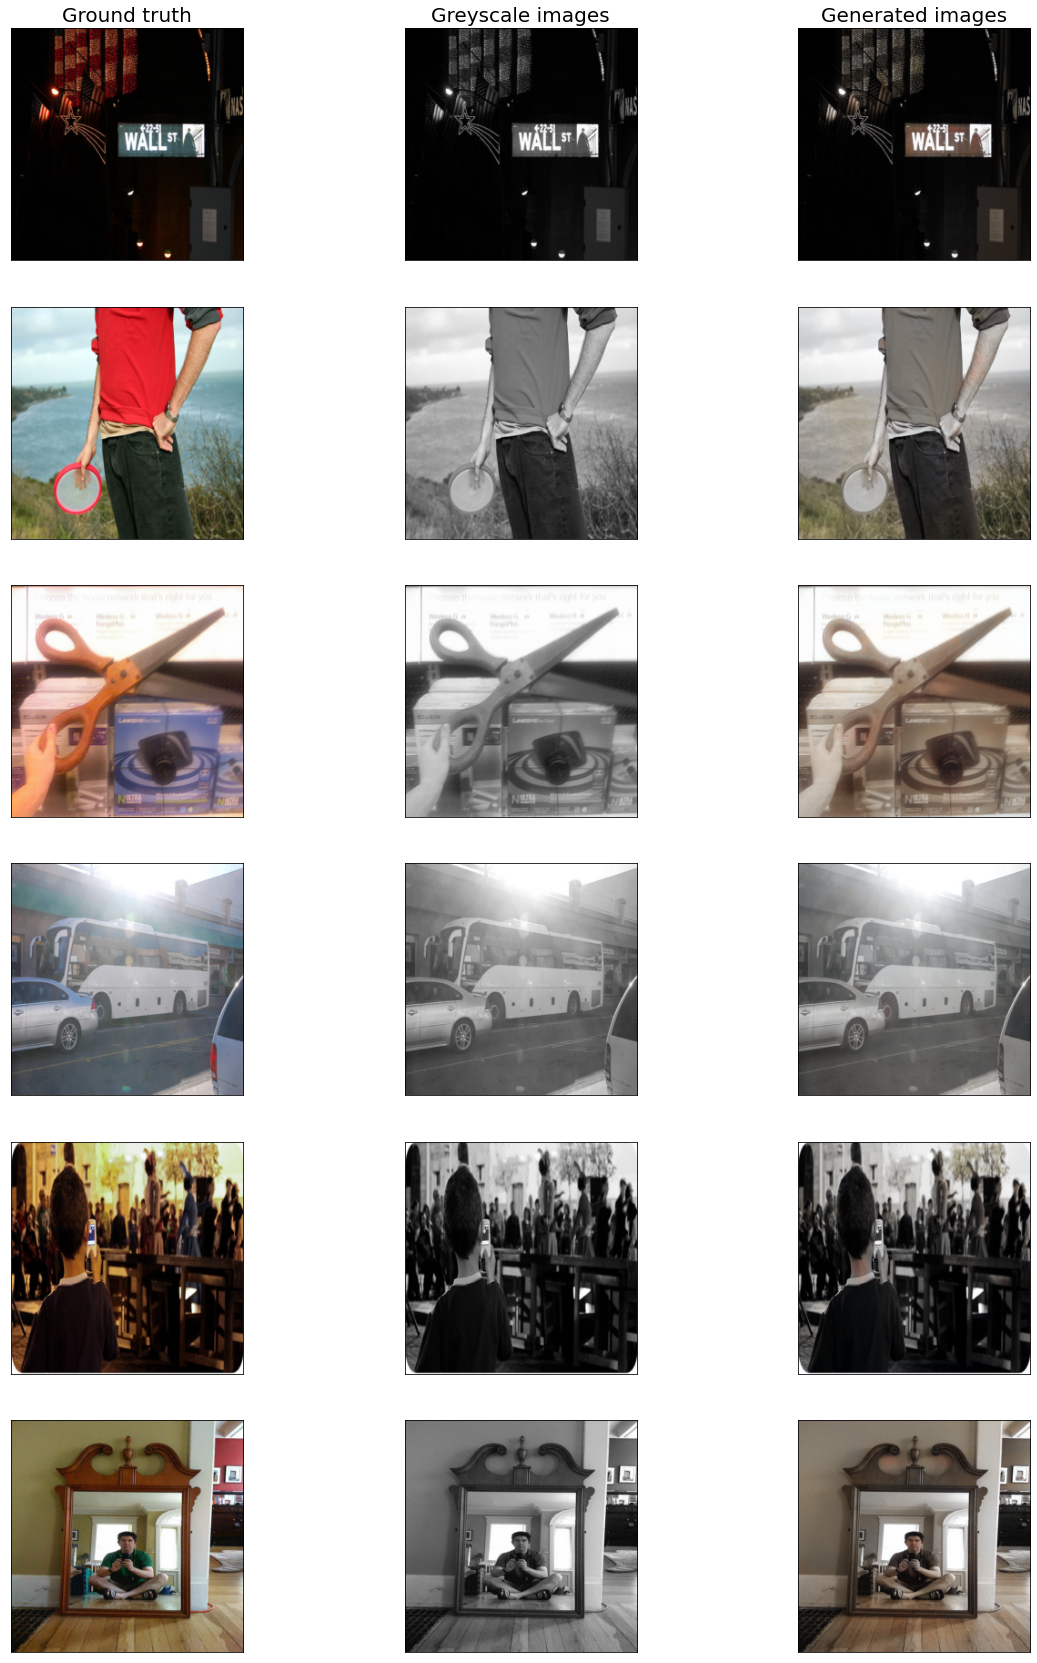

In [12]:
multi_plot_rows(val_loader, generator, rows=batch_size, noise=False)

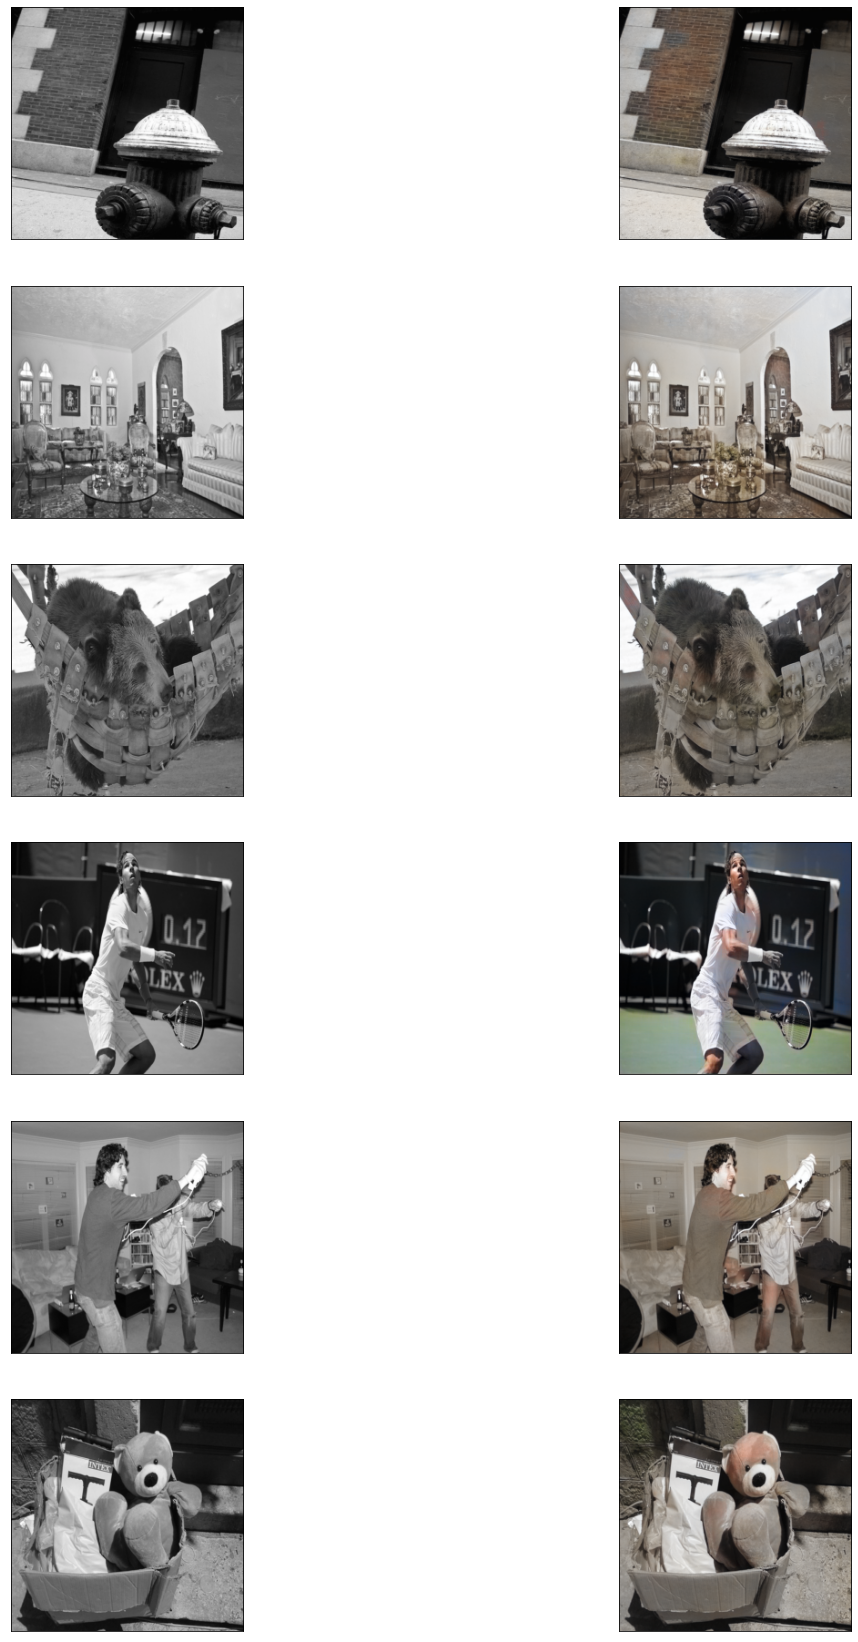

In [10]:
plot_turing(val_loader, generator, rows=batch_size, fake=True)